In [125]:
import numpy as np

In [126]:
import chardet
with open('tripadvisor_hotel_reviews.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'windows-1251', 'confidence': 0.99, 'language': 'Russian'}

In [127]:
import pandas as pd
df = pd.read_csv('tripadvisor_hotel_reviews.csv', encoding='windows-1251')
df.head

<bound method NDFrame.head of     selection1_name,"selection1_selection2_name","selection1_selection2_selection3","selection1_selection2_selection3_url"
0    Глэмпинг Доброе,"Плюсы: Очень красивая заповед...                                                                    
1    Глэмпинг Доброе,"Ездили в глэмпинг Доброе комп...                                                                    
2    Глэмпинг Доброе,"Из плюсов: красивая заповедна...                                                                    
3    Глэмпинг Доброе,"Красиво, дикая природа с идеа...                                                                    
4    Глэмпинг Доброе,"Все отлично, но с газом надо ...                                                                    
..                                                 ...                                                                    
100  Eko-camping SFERA,"Сама по себе идея вообще ог...                                                       

In [128]:
df.rename(columns = {'selection1_name,"selection1_selection2_name","selection1_selection2_selection3","selection1_selection2_selection3_url"': 'reviews'}, inplace = True)
df

reviews
0    Глэмпинг Доброе,"Плюсы: Очень красивая заповед...
1    Глэмпинг Доброе,"Ездили в глэмпинг Доброе комп...
2    Глэмпинг Доброе,"Из плюсов: красивая заповедна...
3    Глэмпинг Доброе,"Красиво, дикая природа с идеа...
4    Глэмпинг Доброе,"Все отлично, но с газом надо ...
..                                                 ...
100  Eko-camping SFERA,"Сама по себе идея вообще ог...
101  Eko-camping SFERA,"При заселении проводили нас...
102  Eko-camping SFERA,"эко кемпинг SFERA - купол п...
103                          СПА ЛЕС глэмпинг,"","",""
104                        Глэмпинг Под Небом,"","",""

[105 rows x 1 columns]

In [132]:
places = []
reviews = []

for element in range(df.size):
    place = df['reviews'][element].split('"')[0]
    review = df['reviews'][element].split('"')[1]
    places.append(place[:-1])
    reviews.append(review)

df = pd.DataFrame({'places': places, 'reviews':reviews})
df

places                                            reviews
0       Глэмпинг Доброе  Плюсы: Очень красивая заповедная зона, просыпа...
1       Глэмпинг Доброе  Ездили в глэмпинг Доброе компанией в конце апр...
2       Глэмпинг Доброе  Из плюсов: красивая заповедная зона, потрясающ...
3       Глэмпинг Доброе  Красиво, дикая природа с идеальным комфортом, ...
4       Глэмпинг Доброе  Все отлично, но с газом надо что то делать. Мо...
..                  ...                                                ...
100   Eko-camping SFERA  Сама по себе идея вообще огонь (если говорить ...
101   Eko-camping SFERA  При заселении проводили нас в наш геокупол #1 ...
102   Eko-camping SFERA  эко кемпинг SFERA - купол плюсы - красивая при...
103    СПА ЛЕС глэмпинг                                                   
104  Глэмпинг Под Небом                                                   

[105 rows x 2 columns]

In [133]:
df1 = df.copy()
places1 = []
data = {}

for row in range(len(df1.index)):
    if df1.iat[row, 0] not in places1:
        places1.append(df1.iat[row, 0])
        df2 = df1[df1['places'] == df1.iat[row, 0]]
#         print(df2)
        tem = []
        for i in range(len(df2.index)):
            tem.append(df2.iat[i, 1].lower())
        data[df1.iat[row, 0]] = tem

reviews1 = []*len(places1)

for i in range(len(places1)):
    reviews1.append(data[places1[i]])
#     reviews1[i] = ' '.join(reviews1[i])

In [134]:
new = pd.DataFrame({'places': places1, 'collected_reviews': reviews1})
new

places  \
0                 Глэмпинг Доброе   
1           Глэмпинг на озере Сиг   
2            Глэмпинг Видно Озеро   
3                Глэмпинг Vezzika   
4              ЛЕС Глэмпинг и спа   
5                Глэмпинг NewCamp   
6             Urman Camp Глэмпинг   
7            Велна Эко Спа Резорт   
8              Глэмпинг Под небом   
9                     Гуляй-Город   
10         Глэмпинг Китовый Берег   
11                 Zelenaya Tropa   
12                    Мамонт Camp   
13                          Скала   
14              Халактырский пляж   
15                          Шикша   
16           База отдыха Салокюля   
17                 Дальний кордон   
18                        Айвенго   
19                     Папоротник   
20               Polyana Glamping   
21             Кемпинг Лес и Море   
22  Майтри Кэмп на Финском Заливе   
23         Глэмпинг Северный Крым   
24         Трувор Глэмпинг Валдай   
25          Глемпинг Старый Сивух   
26              Долина мечтателей   
27              Eko-camping SFERA   
28               СПА ЛЕС глэмпинг   
29             Глэмпинг Под Небом   

                                    collected_reviews  
0   [плюсы: очень красивая заповедная зона, просып...  
1   [отдыхала одна с двумя детьми. очень повезло с...  
2   [забронировал проживание в глэмпинге , случайн...  
3   [плюсы: - хорошее и красивое местоположение ми...  
4   [решили мы посетить это чудесное место , забро...  
5   [глэмпинг находится близ посёлка эссойла, в со...  
6   [приехали в глэмпинг к 5 попросили заранее зат...  
7   [мне есть с чем сравнивать, поэтому посетив за...  
8   [отличные условия проживания, очень отзывчивый...  
9   [приехали сегодня после дороги и музея в серпу...  
10  [мы не могли и предположить, что получим столь...  
11  [итак, вы платите 30 000 рублей за две ночи, б...  
12  [потрясающее единение комфорта, уюта, невероят...  
13  [проживали в домике с видом на море. ощутил по...  
14                                                 []  
15  [прекрасное места для отдыха душой и телом. бе...  
16  [отдыхали в этом чудесном местечке неделю в се...  
17  [турбаза находится недалеко от москвы - пример...  
18  [выбрали отдых на алтае как альтернативу поезд...  
19  [решили отдохнуть в карелии. выбрали это место...  
20  [потрясающая локация, идеальное место, чтобы п...  
21  [отдыхали 3 ночи, с малышом 6 мес и собакой дж...  
22  [место очень красивое, живописное! финский зал...  
23  [не реклама...:)...довелось проездом сутки на ...  
24  [атмосферное, уютное и очень душевное место. у...  
25  [выходные пролетели как маленькая жизнь! они б...  
26                                                 []  
27  [были два дня назад. место волшебное - ощущени...  
28                                                 []  
29                                                 []

## Cleaning data

In [31]:
!pip install regex

In [135]:
import re
import string

In [136]:
import nltk
import pymorphy2
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [137]:
stop = stopwords.words('russian')
stop.remove('хорошо')
stop.append('это')
stop.append('место')
stop.append('персонал')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def preprocessing(review):
    
    # data cleaning
    review = review.lower()
    review = re.sub(r'((www.\.\[^\s]+)|(https?://[^\s]+))', r'', review)
    review = re.sub(r'@[^\s]+', r'', review)
    review = re.sub(r'\W*\b\w{1,3}\b', r'', review)
    
    token = nltk.word_tokenize(review)
    
    review = [word for word in token if (word not in stop and word not in string.punctuation 
                                         and word != "' '" and word != "``" and word != "''" and word.isnumeric() == False) ]
    
    review = ' '.join(pymorphy2.MorphAnalyzer().parse(word)[0].normal_form for word in review)
#     review = [lemmatizer.lemmatize(word) for word in review]
#     review = ' '.join(review)
    
    return review 

In [138]:
def prepareOnePlaceReviews(reviews):
    for i in range(len(reviews)):
        reviews[i] = preprocessing(reviews[i])
    return reviews

In [32]:
new.iat[20,1]

['потрясающая локация, идеальное место, чтобы провести время в калининграде. приезжаем во второй раз, впервые были в 2019 году. глэмпинг - на территории заповедника со всеми вытекающими преимуществами, много живности, прекрасная природе и, конечно, море. думается, что с маленькими детьми может быть не очень комфортно, но это на усмотрение родителей. очень удобные кровати и сам шатер не уступает уровню хорошего отеля. цены - приятные, особенно после подмосковных глэмпингов. очень здорово, что можно вкусно поесть, на косе нормального кафе больше нет. полный комфорт, а если повезет с погодой, то отдых удастся на 1000%. спасибо сотрудникам глэмпинга за организацию прекрасного отдыха!',
 'само место чудесное, на лоне природы, рядом балтийское море с широчайшим и почти безлюдным пляжем. но как пишут многие, это не заслуга создателей так называемого ',
 'отдыхали с женой в этом красивом месте. ночью поют птицы, очень романтично и необыкновенно. первый раз отдыхали в подобном формате. как пишу

In [40]:
st = prepareOnePlaceReviews(new.iat[20,1])
st

['потрясать локация идеальный провести время калининград приезжать второй впервые глэмпинг территория заповедник весь вытекать преимущество живность прекрасный природа море думаться маленький ребёнок очень комфортно усмотрение родитель очень удобный кровать шатёр уступать уровень хороший отель цена приятный особенно подмосковный глэмпинг очень здорово вкусно поесть нормальный кафе полный комфорт повезти погода отдых удаться спасибо сотрудник глэмпинг организация прекрасный отдых',
 'чудесный лоно природа рядом балтийский море широкий безлюдный пляж писать многие заслуга создатель называть',
 'отдыхать жена красивый ночью петь птица очень романтично необыкновенно первый отдыхать подобный формат писать многие дороговатый согласиться полностью который подавать вообще никакой завтрак подавать очень долго холодное вечером заказать рыба пресный кислый рыба сухой слово невкусно долго вежливый весь парень усик девушка остальной натягивать улыбка видно рада девушка глаз рыба весь поведение пока

In [139]:
new['collected_reviews'] = new['collected_reviews'].apply(lambda reviews: prepareOnePlaceReviews(reviews))

In [258]:
new1 = new.copy()
new2 = new.copy()

In [145]:
new

places  \
0                 Глэмпинг Доброе   
1           Глэмпинг на озере Сиг   
2            Глэмпинг Видно Озеро   
3                Глэмпинг Vezzika   
4              ЛЕС Глэмпинг и спа   
5                Глэмпинг NewCamp   
6             Urman Camp Глэмпинг   
7            Велна Эко Спа Резорт   
8              Глэмпинг Под небом   
9                     Гуляй-Город   
10         Глэмпинг Китовый Берег   
11                 Zelenaya Tropa   
12                    Мамонт Camp   
13                          Скала   
14              Халактырский пляж   
15                          Шикша   
16           База отдыха Салокюля   
17                 Дальний кордон   
18                        Айвенго   
19                     Папоротник   
20               Polyana Glamping   
21             Кемпинг Лес и Море   
22  Майтри Кэмп на Финском Заливе   
23         Глэмпинг Северный Крым   
24         Трувор Глэмпинг Валдай   
25          Глемпинг Старый Сивух   
26              Долина мечтателей   
27              Eko-camping SFERA   
28               СПА ЛЕС глэмпинг   
29             Глэмпинг Под Небом   

                                    collected_reviews  
0   [плюс очень красивый заповедный зона просыпать...  
1   [отдыхать один два ребёнок очень повезти погод...  
2   [забронировать проживание глэмпинг, случайно о...  
3   [плюс хороший красивый местоположение минус ин...  
4   [решить посетить чудесный забронировать значит...  
5   [глэмпинг находиться близ посёлок эссойло сосн...  
6   [приехать глэмпинг попросить заранее затопить ...  
7   [сравнивать поэтому посетить загородный-отель ...  
8   [отличный условие проживание очень отзывчивый ...  
9   [приехать сегодня дорога музей серпухов доброж...  
10  [мочь предположить получить столько новый эмоц...  
11  [итак платить рубль ночь доплачивать три килог...  
12  [потрясать единение комфорт уют невероятно вку...  
13  [проживать домик вид море ощутить полный идилл...  
14                                                 []  
15  [прекрасный место отдых душа тело бескрайний в...  
16  [отдыхать чудесный местечко неделя сентябрь се...  
17  [турбаза находиться недалеко москва примерно м...  
18  [выбрать отдых алтай альтернатива поездка море...  
19  [решить отдохнуть карелия выбрать думать отдох...  
20  [потрясать локация идеальный провести время ка...  
21  [отдыхать ночь малыш собака джек рассесть терь...  
22  [очень красивый живописный финский залив велик...  
23  [реклама ... ... довестись проезд сутки база п...  
24  [атмосферный уютный очень душевный уединение с...  
25  [выходной пролететь маленький жизнь насыщенный...  
26                                                 []  
27  [назад волшебный ощущение побывать настоящий с...  
28                                                 []  
29                                                 []

## Dostoevsky
### On reviews collected from place Глэмпинг Доброе 

In [2]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [3]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [207]:
places_list = []
reviews_list = []

for i in range(len(new.index)):
    for k in range(len(new.iat[i,1])):
        places_list.append(new.iat[i,0])
        reviews_list.append(new.iat[i,1][k])

sep_df = pd.DataFrame({'places': places_list, 'reviews': reviews_list})
sep_df

places                                            reviews
0       Глэмпинг Доброе  плюс очень красивый заповедный зона просыпатьс...
1       Глэмпинг Доброе  ездить глэмпинг добрый компания конец апрель п...
2       Глэмпинг Доброе  плюс красивый заповедный зона потрясать закат ...
3       Глэмпинг Доброе  красиво дикий природа идеальный комфорт артур ...
4       Глэмпинг Доброе  отлично газ делать электро печь поставить экон...
..                  ...                                                ...
100   Eko-camping SFERA  сам идея вообще огонь говорить сфера явно увид...
101   Eko-camping SFERA  заселение проводить геокупол вопрос отвечать н...
102   Eko-camping SFERA  кемпинг sfera купол плюс красивый природа воле...
103    СПА ЛЕС глэмпинг                                                   
104  Глэмпинг Под Небом                                                   

[105 rows x 2 columns]

In [259]:
results = model.predict(reviews_list, k=2)

sentiment_list=[]

for sentiment in results:
    sentiment_list.append(sentiment)

    
neutral_list = []
negative_list = []
positive_list = []
    
for sentiment in sentiment_list:
    neutral = sentiment.get('neutral')
    negative = sentiment.get('negative')
    positive = sentiment.get('positive')
    if neutral is None:
        neutral_list.append(0)
    else:
        neutral_list.append(sentiment.get('neutral'))
    if negative is None:
        negative_list.append(0)
    else:
        negative_list.append(sentiment.get('negative'))
    if positive is None:
        positive_list.append(0)
    else:
        positive_list.append(sentiment.get('positive'))

sep_df['positive'] = positive_list
sep_df['negative'] = negative_list
sep_df['neutral'] = neutral_list

In [260]:
overall = []
for i in range(len(sep_df.index)):
    mx = max(positive_list[i], negative_list[i], neutral_list[i])
    if mx == positive_list[i]:
        m = 1
    else:
        m = 0
    overall.append(m)

    
sep_df['mood'] = overall
sep_df

places                                            reviews  \
0       Глэмпинг Доброе  плюс очень красивый заповедный зона просыпатьс...   
1       Глэмпинг Доброе  ездить глэмпинг добрый компания конец апрель п...   
2       Глэмпинг Доброе  плюс красивый заповедный зона потрясать закат ...   
3       Глэмпинг Доброе  красиво дикий природа идеальный комфорт артур ...   
4       Глэмпинг Доброе  отлично газ делать электро печь поставить экон...   
..                  ...                                                ...   
100   Eko-camping SFERA  сам идея вообще огонь говорить сфера явно увид...   
101   Eko-camping SFERA  заселение проводить геокупол вопрос отвечать н...   
102   Eko-camping SFERA  кемпинг sfera купол плюс красивый природа воле...   
103    СПА ЛЕС глэмпинг                                                      
104  Глэмпинг Под Небом                                                      

     positive  negative   neutral  mood  
0    0.314061  0.000000  0.245095     1  
1    0.182436  0.523430  0.000000     0  
2    0.287778  0.000000  0.275140     1  
3    0.884049  0.000000  0.112805     1  
4    0.287778  0.430157  0.000000     0  
..        ...       ...       ...   ...  
100  0.000000  0.307368  0.592677     0  
101  0.000000  0.437833  0.468801     0  
102  0.000000  0.384922  0.000000     0  
103  0.000000  0.000010  1.000010     0  
104  0.000000  0.000010  1.000010     0  

[105 rows x 6 columns]

In [264]:
sep_cleaned_df = sep_df.copy()
sep_cleaned_df.drop(sep_cleaned_df[sep_cleaned_df['reviews'] == ''].index)

places                                            reviews  \
0      Глэмпинг Доброе  плюс очень красивый заповедный зона просыпатьс...   
1      Глэмпинг Доброе  ездить глэмпинг добрый компания конец апрель п...   
2      Глэмпинг Доброе  плюс красивый заповедный зона потрясать закат ...   
3      Глэмпинг Доброе  красиво дикий природа идеальный комфорт артур ...   
4      Глэмпинг Доброе  отлично газ делать электро печь поставить экон...   
..                 ...                                                ...   
98   Eko-camping SFERA  назад волшебный ощущение побывать настоящий ск...   
99   Eko-camping SFERA  спойлер крайне отвратительный ужасный сервис к...   
100  Eko-camping SFERA  сам идея вообще огонь говорить сфера явно увид...   
101  Eko-camping SFERA  заселение проводить геокупол вопрос отвечать н...   
102  Eko-camping SFERA  кемпинг sfera купол плюс красивый природа воле...   

     positive  negative   neutral  mood  
0    0.314061  0.000000  0.245095     1  
1    0.182436  0.523430  0.000000     0  
2    0.287778  0.000000  0.275140     1  
3    0.884049  0.000000  0.112805     1  
4    0.287778  0.430157  0.000000     0  
..        ...       ...       ...   ...  
98   0.341593  0.000000  0.414909     0  
99   0.000000  0.320831  0.250923     0  
100  0.000000  0.307368  0.592677     0  
101  0.000000  0.437833  0.468801     0  
102  0.000000  0.384922  0.000000     0  

[101 rows x 6 columns]

## WordClouds

In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Negative wordcloud

Глэмпинг Доброе


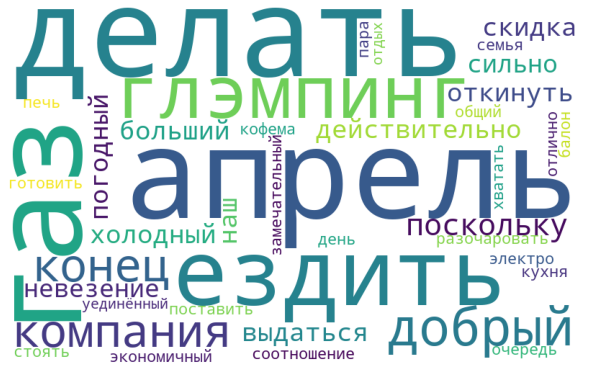

Глэмпинг на озере Сиг


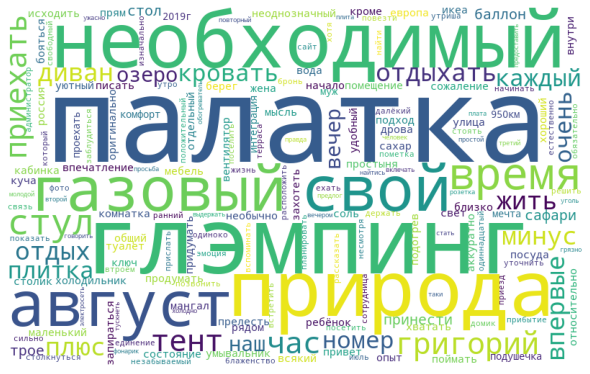

Глэмпинг Видно Озеро


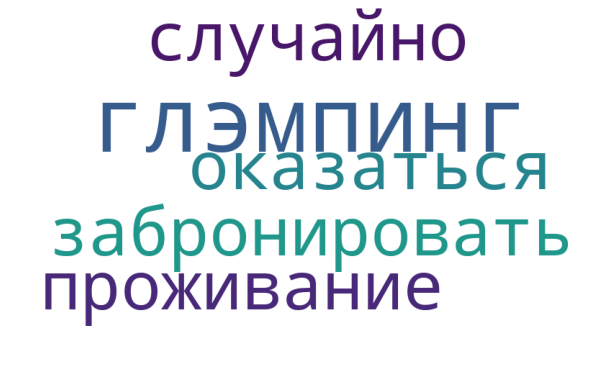

Глэмпинг Vezzika


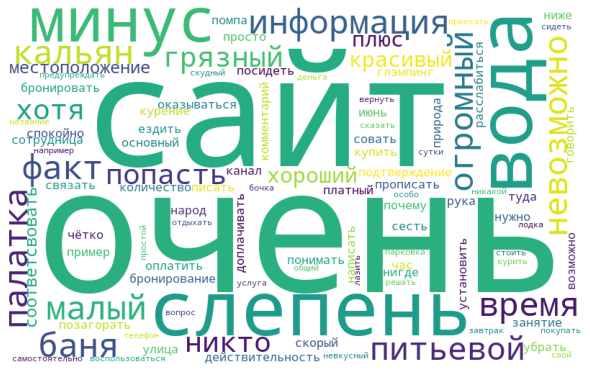

ЛЕС Глэмпинг и спа


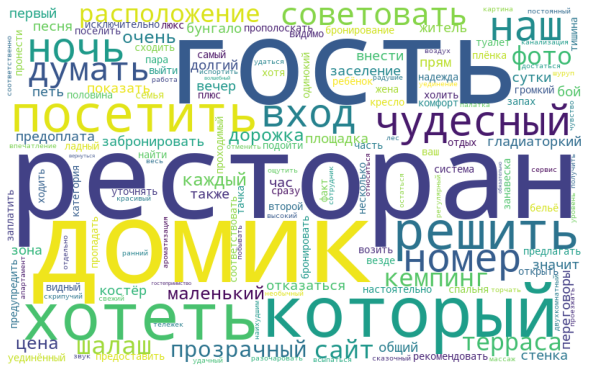

Глэмпинг NewCamp


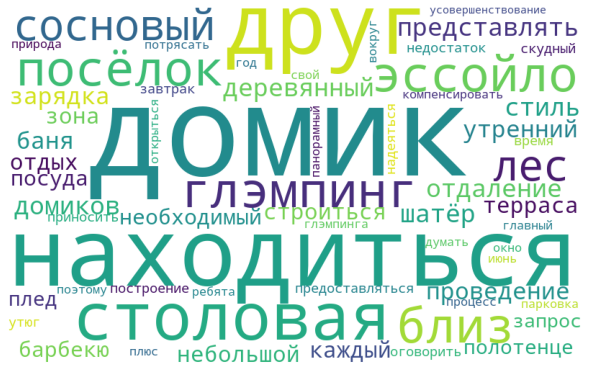

Urman Camp Глэмпинг


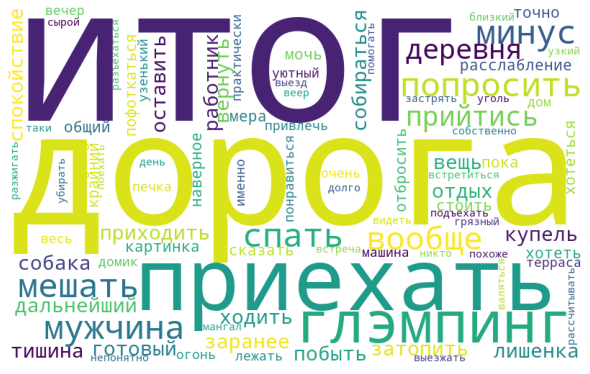

Велна Эко Спа Резорт


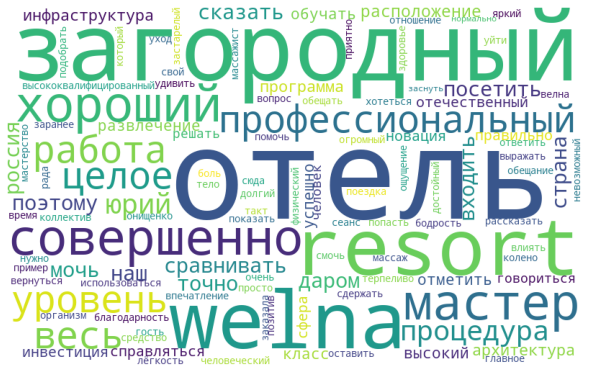

Глэмпинг Под небом


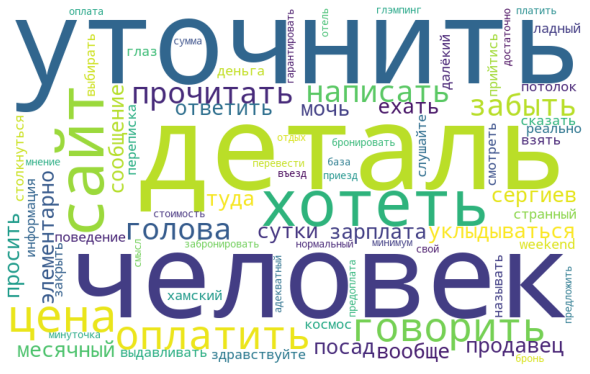

Гуляй-Город


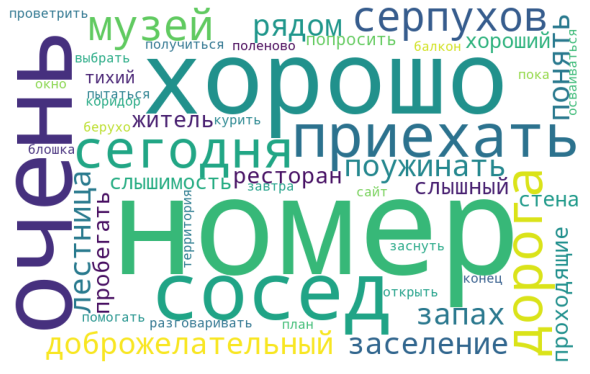

Глэмпинг Китовый Берег


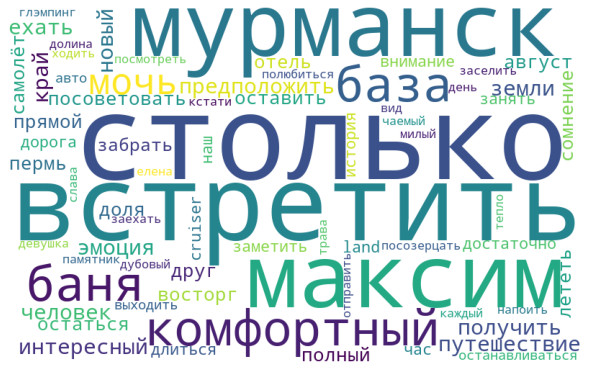

Zelenaya Tropa


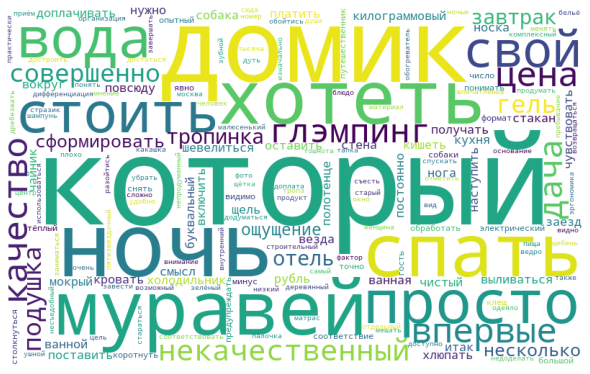

Мамонт Camp


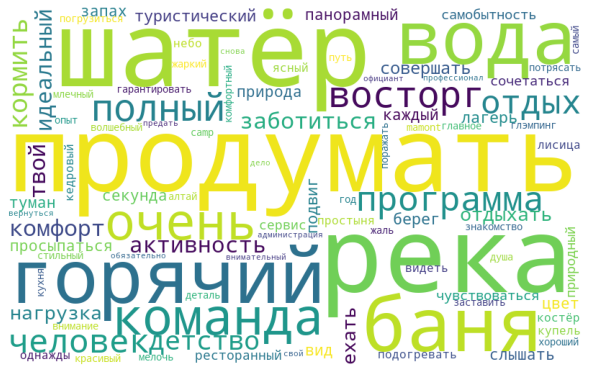

Скала


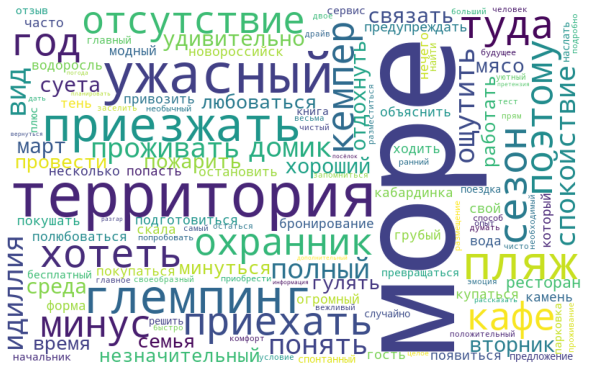

Халактырский пляж
Шикша


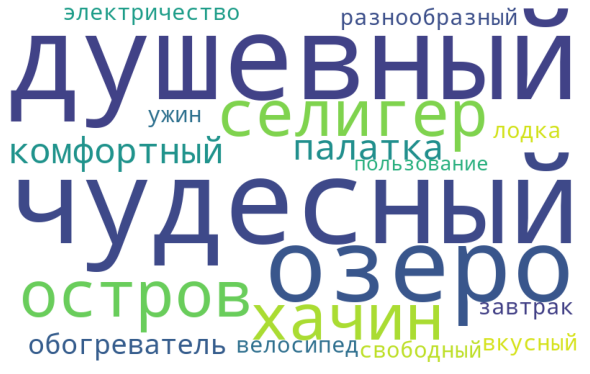

База отдыха Салокюля
Дальний кордон


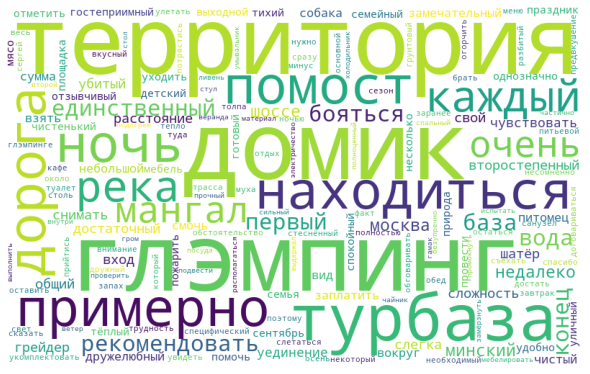

Айвенго


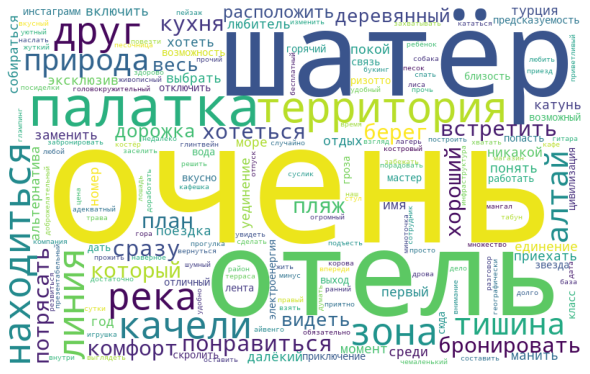

Папоротник


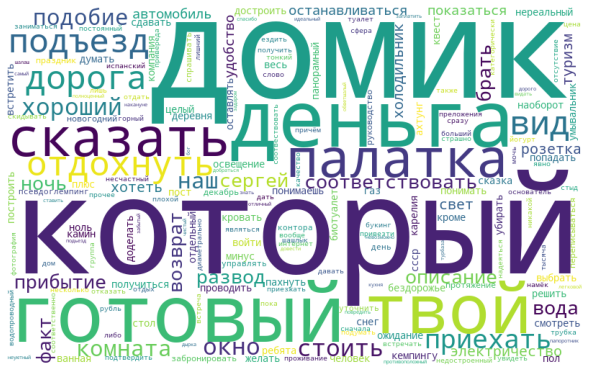

Polyana Glamping


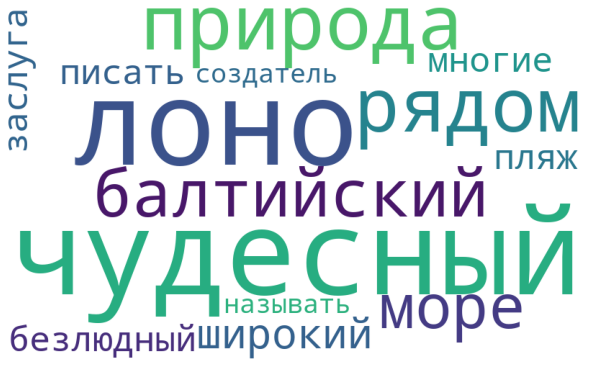

Кемпинг Лес и Море


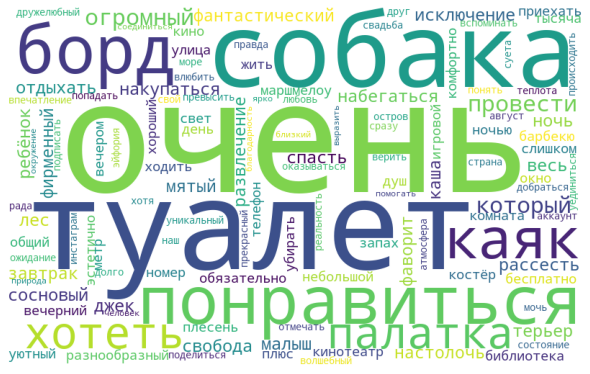

Майтри Кэмп на Финском Заливе


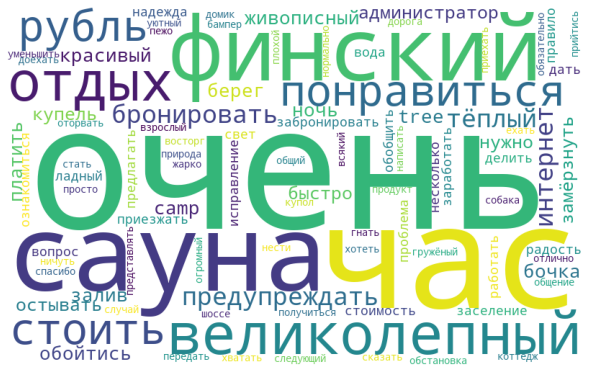

Глэмпинг Северный Крым


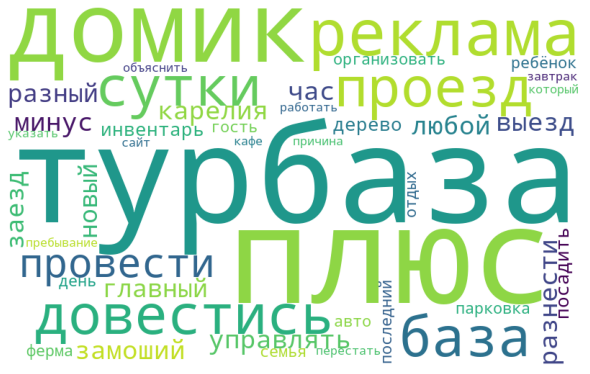

Трувор Глэмпинг Валдай
Глемпинг Старый Сивух
Долина мечтателей
Eko-camping SFERA


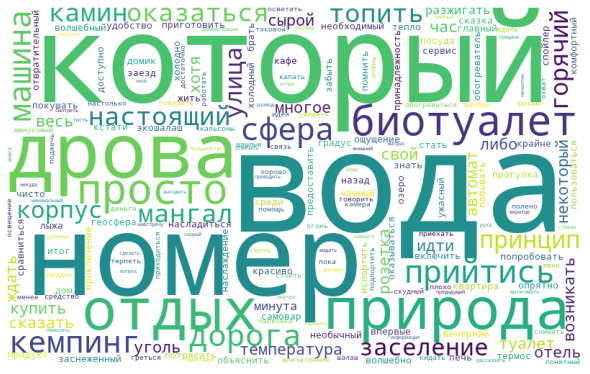

СПА ЛЕС глэмпинг
Глэмпинг Под Небом


In [266]:
for t in range(new['places'].size):
    words_list = sep_cleaned_df[(sep_cleaned_df['mood'] == 0) & (sep_cleaned_df['places'] == new['places'][t])]['reviews'].unique().tolist()
    neg_words = " ".join(words_list)
    
    if neg_words != '':
        
        neg_wordcloud =  WordCloud(background_color = 'white', width=800, height = 500, stopwords = stop).generate(neg_words)

        plt.figure(figsize=(8, 8), facecolor = None)
        plt.imshow(neg_wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        print(new['places'][t])
        plt.show()
    else:
        print(new['places'][t])
    

### Positive wordcloud

Глэмпинг Доброе


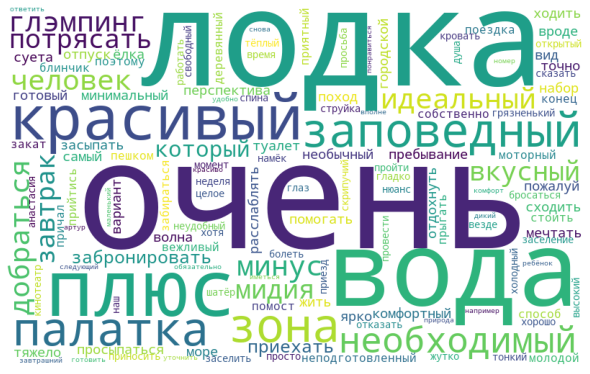

Глэмпинг на озере Сиг


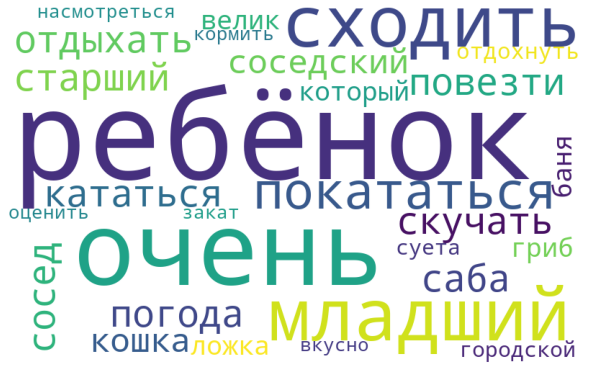

Глэмпинг Видно Озеро
Глэмпинг Vezzika


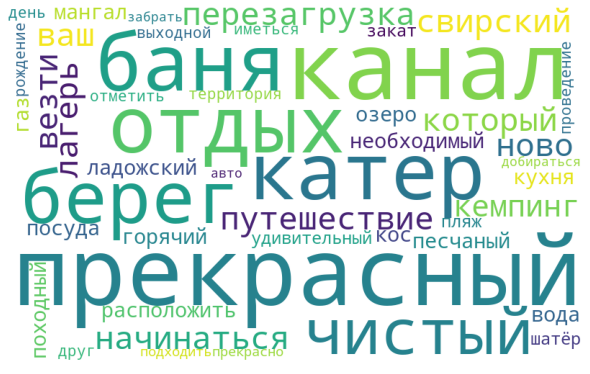

ЛЕС Глэмпинг и спа


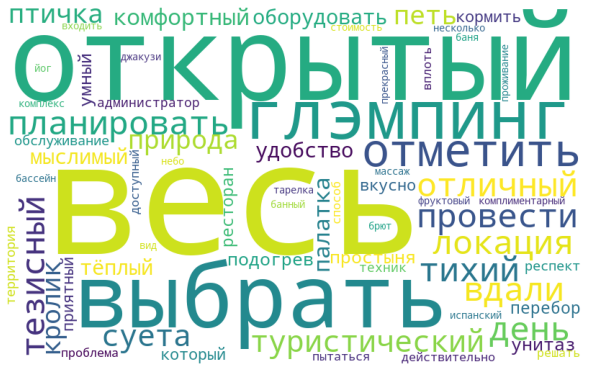

Глэмпинг NewCamp
Urman Camp Глэмпинг


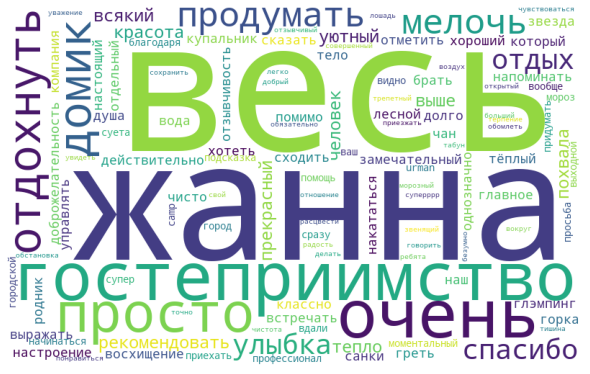

Велна Эко Спа Резорт


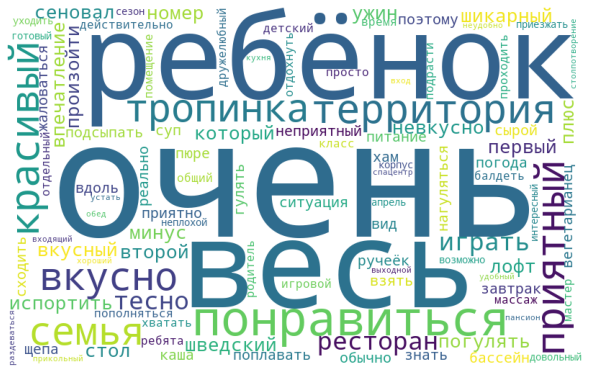

Глэмпинг Под небом


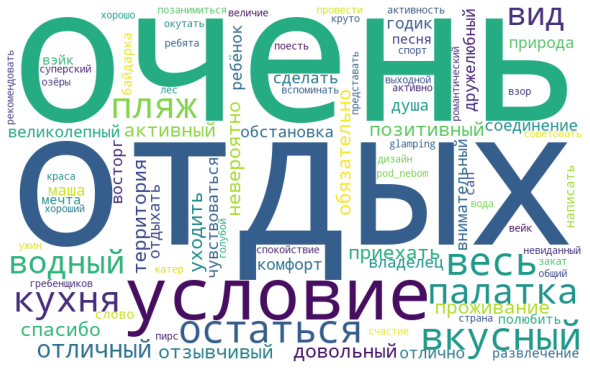

Гуляй-Город


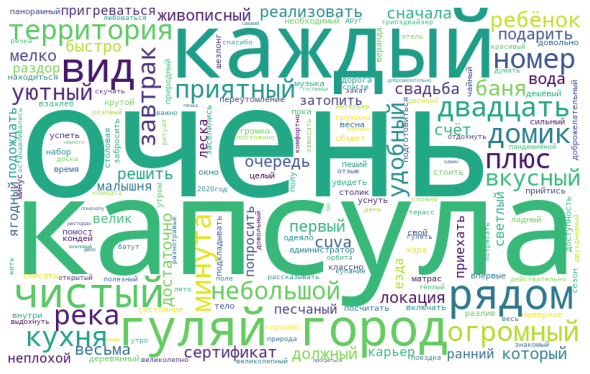

Глэмпинг Китовый Берег
Zelenaya Tropa


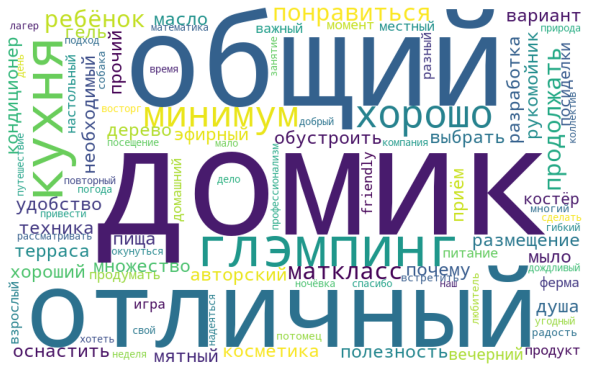

Мамонт Camp


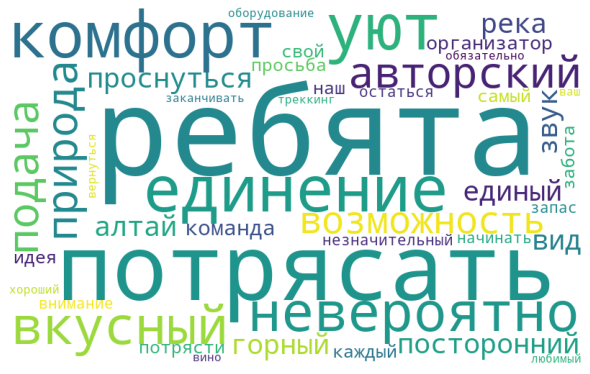

Скала


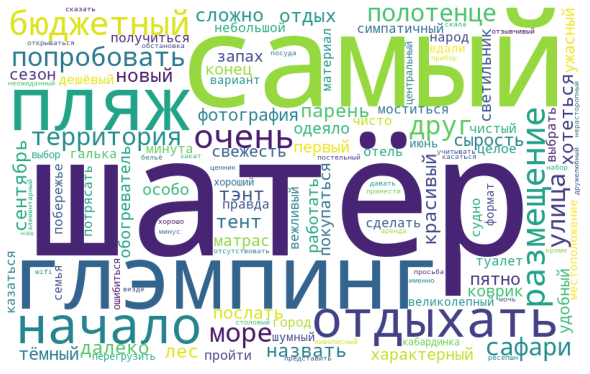

Халактырский пляж
Шикша


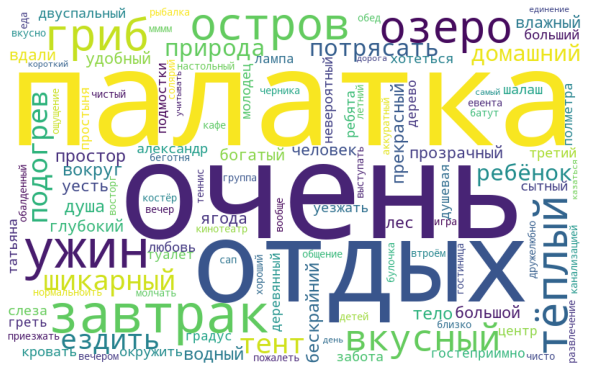

База отдыха Салокюля


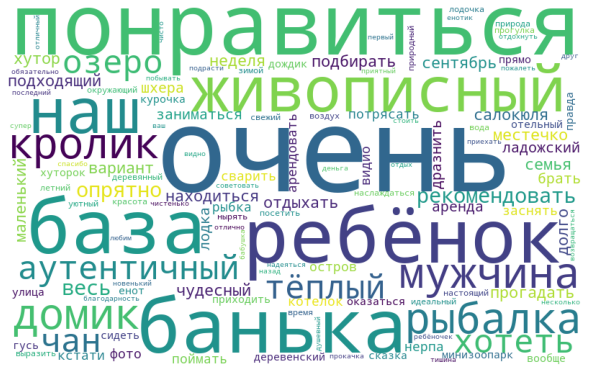

Дальний кордон
Айвенго


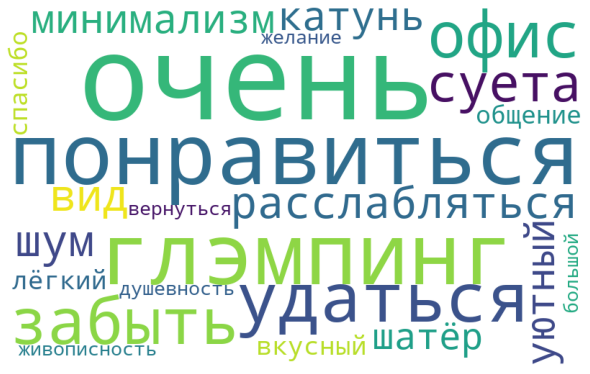

Папоротник
Polyana Glamping


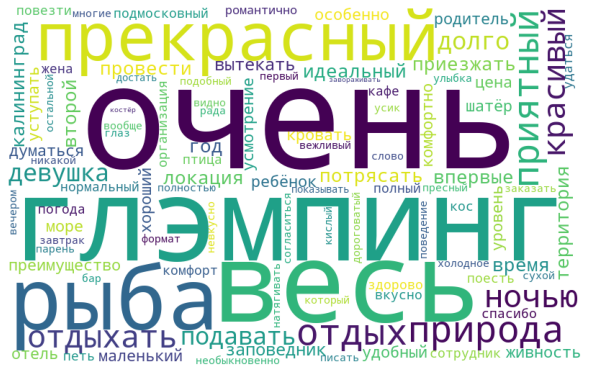

Кемпинг Лес и Море


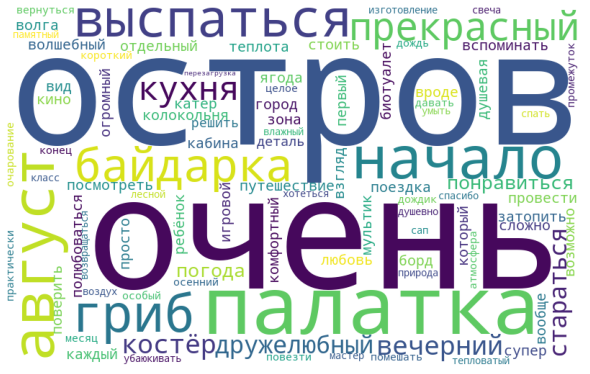

Майтри Кэмп на Финском Заливе


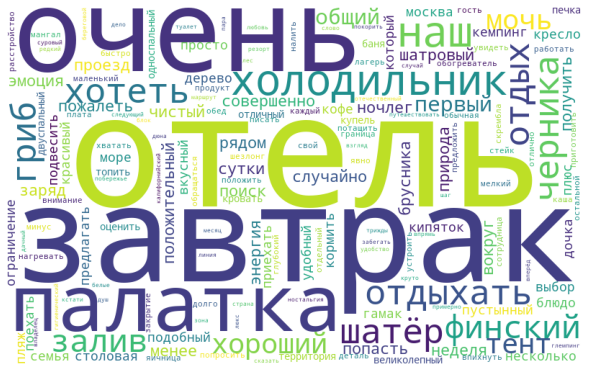

Глэмпинг Северный Крым
Трувор Глэмпинг Валдай


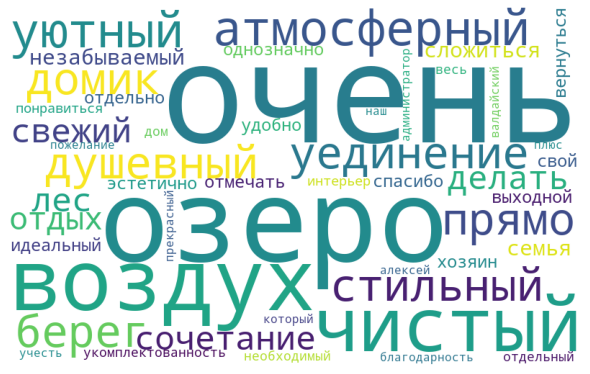

Глемпинг Старый Сивух


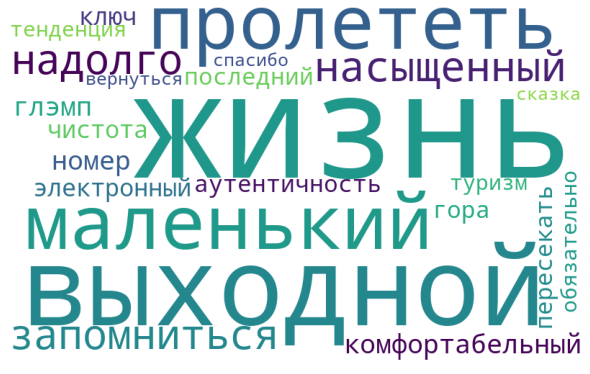

Долина мечтателей
Eko-camping SFERA
СПА ЛЕС глэмпинг
Глэмпинг Под Небом


In [267]:
for t in range(new['places'].size):
    words_list = sep_cleaned_df[(sep_cleaned_df['mood'] == 1) & (sep_cleaned_df['places'] == new['places'][t])]['reviews'].unique().tolist()
    neg_words = " ".join(words_list)
    
    if neg_words != '':
        
        neg_wordcloud =  WordCloud(background_color = 'white', width=800, height = 500, stopwords = stop).generate(neg_words)

        plt.figure(figsize=(8, 8), facecolor = None)
        plt.imshow(neg_wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        print(new['places'][t])
        plt.show()
    else:
        print(new['places'][t])

## Vectorizing text

### Divide the data on train and test groups

In [306]:
from sklearn.model_selection import train_test_split
data = sep_df.copy()
y = data['mood'].values
data.drop(['mood'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (84, 5) (84,)
Test data: (21, 5) (21,)


### BOW

In [307]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=10)

X_train_review_bow = vect.fit_transform(X_train['reviews'])
X_test_review_bow = vect.transform(X_test['reviews'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (84, 43)
X_test_review_bow shape:  (21, 43)


### TF-IDF

In [308]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['reviews'])
X_test_review_tfidf = vectorizer.transform(X_test['reviews'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (84, 43)
X_test_review_tfidf shape:  (21, 43)


## Building models

### Naive Buyes model 

In [309]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred)) 

Test Accuracy:  0.7142857142857143


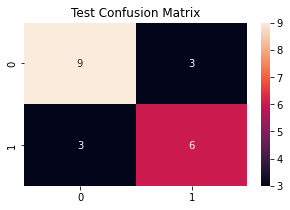

In [310]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

### Naive Buyes TF-IDF

In [311]:
clf = MultinomialNB(alpha=1)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.6190476190476191


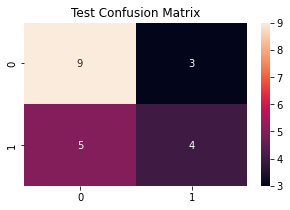

In [312]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

### Logistic regression TF-IDF

In [278]:
import warnings
warnings.filterwarnings('ignore')

In [313]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.6190476190476191


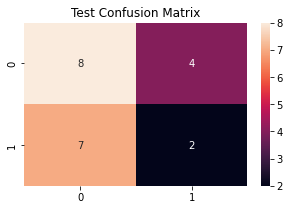

In [305]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

# Conclusion 

In [314]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Vectorizer', 'Model', 'Accuracy']
x.add_row(['BOW', 'Naive Bayes', '71.4%'])
x.add_row(['TFIDF', 'Naive Bayes', '61.9%'])
x.add_row(['TFIDF', 'Logistic Regression', '61.9%'])
print(x)

+------------+---------------------+----------+
| Vectorizer |        Model        | Accuracy |
+------------+---------------------+----------+
|    BOW     |     Naive Bayes     |  71.4%   |
|   TFIDF    |     Naive Bayes     |  61.9%   |
|   TFIDF    | Logistic Regression |  61.9%   |
+------------+---------------------+----------+
